In [1]:
import numpy as np
import IsingLib

def fib(m, n):
    a = b = m
    for _ in range(n):
        yield a
        a, b = b, a + b

In [2]:
bit = 20
value = 2 ** (bit - 1) # 符号付き19ビット
num = 20
qubo = 'qubo'
ising = 'ising'
mat = np.random.randint(-value, value+1, (num, num))
# li = list(fib(1, num))
keta = 1000
li = np.array([i for i in range(1 + keta, 21 + keta)])
num = len(li)
mat = [[0 if x == y else li[x] * li[y] * 2 for x in range(num)] for y in range(num)]
const = float(sum([i ** 2 for i in li]))
model = IsingLib.Model(ising, H1=(mat, const))
# model = IsingLib.Model(qubo, H1=mat)

In [3]:
model.compile()
qubo_mat, qubo_c = model.get_matrix(qubo)
ising_mat, ising_c = model.get_matrix(ising)

In [4]:
qubo_bf = IsingLib.Bulletforce(qubo_mat, qubo_c, qubo)
ising_bf = IsingLib.Bulletforce(ising_mat, ising_c, ising)
qubo_re = IsingLib.Reduce(qubo_mat)
ising_re = IsingLib.Reduce(ising_mat)
print(qubo_re.scr_bit, ising_re.scr_bit)

28 22


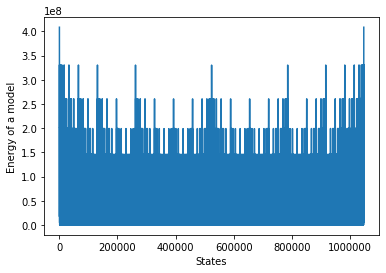

5448


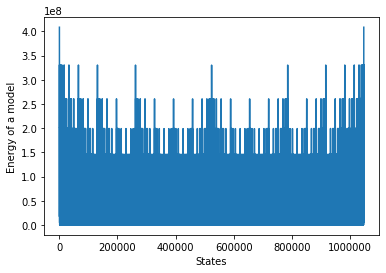

5448


In [18]:
qubo_optimal = qubo_bf.get_optimal()
qubo_bf.draw_eng()
print(len(qubo_optimal[1]))

ising_optimal = ising_bf.get_optimal()
ising_bf.draw_eng()
print(len(ising_optimal[1]))

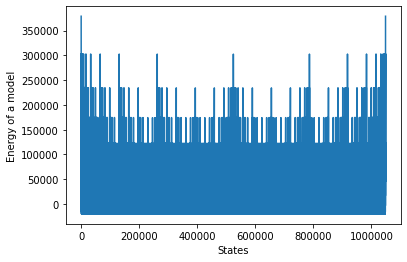

5448


In [19]:
ising_re_mat, ising_re_c = ising_re.gradate(12)
ising_re_bf = IsingLib.Bulletforce(ising_re_mat, ising_re_c, 'ising')
ising_re_optimal = ising_re_bf.get_optimal()
ising_re_bf.draw_eng()
org_ans = set(ising_optimal[1])
re_ans = set(ising_re_optimal[1])
same_ans = list(org_ans & re_ans)
print(len(same_ans))

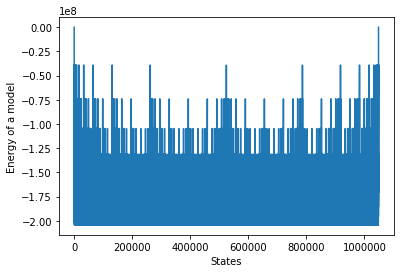

5448


In [21]:
qubo_re_mat, qubo_re_c = qubo_re.gradate(27)
qubo_re_bf = IsingLib.Bulletforce(qubo_re_mat, qubo_re_c, 'qubo')
qubo_re_optimal = qubo_re_bf.get_optimal()
qubo_re_bf.draw_eng()
org_ans = set(qubo_optimal[1])
re_ans = set(qubo_re_optimal[1])
same_ans = list(org_ans & re_ans)
print(len(same_ans))